# Assignment 3: Scatterplots

Imogen Cleaver-Stigum

CS 573 Data Visualization

Due 26 Feb 2021

In [1]:
import numpy as np
import pandas as pd

cars = pd.read_csv(r'C:\Users\imoge\02-datavis-7ways\cars-sample.csv')
cars.head()

,Unnamed: 0,Car,Manufacturer,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model.Year,Origin
0,5,torino,ford,17.0,8,302,140.0,3449,10.5,70,American
1,6,galaxie 500,ford,15.0,8,429,198.0,4341,10.0,70,American
2,13,torino (sw),ford,NaN,8,351,153.0,4034,11.0,70,American
3,18,mustang boss 302,ford,NaN,8,302,140.0,3353,8.0,70,American
4,21,corona mark ii,toyota,24.0,4,113,95.0,2372,15.0,70,Japanese


Get some nice colors 

In [2]:
manu = np.unique(cars['Manufacturer'])
manu

array(['bmw', 'ford', 'honda', 'mercedes', 'toyota'], dtype=object)

In [3]:
len(manu)

5

In [4]:
colors = ['tab:pink', 'tab:olive', 'tab:grey', 'tab:brown', 'tab:cyan']
#             bmw        ford        honda       mercedes     toyota
car_colors = ['#000000']*len(cars)
for i in range(len(cars)):
    for j in range(len(manu)):
        if cars['Manufacturer'][i] == manu[j]:
            car_colors[i] = colors[j]

# Matplotlib

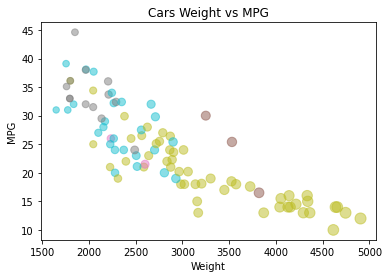

In [9]:
import matplotlib.pyplot as plt

plt.scatter(cars['Weight'], cars['MPG'], alpha=0.5, s=cars['Weight']/40, c=car_colors, marker='o')
plt.title('Cars Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.show()

# Seaborn

Text(0.5, 1.0, 'Cars Weight vs MPG')

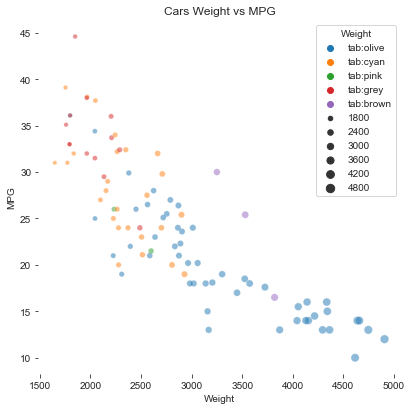

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')
# sns.set_style("dark")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x=cars['Weight'], y=cars['MPG'],
                hue=car_colors, size=cars['Weight'],
                alpha=.5)
ax.set_title('Cars Weight vs MPG')

# Plotly

In [6]:
import plotly.express as px
fig = px.scatter(cars, x="Weight", y="MPG", color="Manufacturer",
                 size='Weight', hover_data=['Horsepower', 'Car'], title='Cars Weight vs MPG')
fig.show()

# Altair

In [35]:
import altair as alt

alt.Chart(cars).mark_circle().encode(
    alt.X('Weight',
        scale=alt.Scale(domain=(1500, 5000))
    ),
    alt.Y('MPG',
        scale=alt.Scale(domain=(8, 47))
    ),
    color='Manufacturer',
    size='Weight'
).interactive().properties(
    title='Cars Weight vs MPG'
).transform_window(
    rolling_mean='mean(temp_max)',
    frame=[-15, 15]
)

alt.Chart(...)